### Exposé sur l'algorithme de clustering SNN

In [2]:
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from scipy.sparse import csr_matrix

In [4]:
# Fonction pour générer les données
def generate_data():
    X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
    return X

data = generate_data()
data

array([[ 6.22519125e-01, -3.72101344e-01],
       [ 1.90426932e+00, -1.36302945e-01],
       [-6.94312816e-02,  4.56116985e-01],
       [ 9.33898633e-01,  2.37482827e-01],
       [ 1.18035952e+00, -4.90846917e-01],
       [ 1.02541488e+00, -4.62482874e-01],
       [ 4.11984697e-01, -2.85969715e-01],
       [-6.12663134e-01,  7.29788185e-01],
       [ 9.48145854e-01,  7.95791386e-02],
       [ 1.71242445e-01,  1.58374951e-03],
       [ 1.29201956e+00, -3.77322706e-01],
       [ 3.72211026e-01,  8.92249223e-01],
       [ 9.16250451e-01, -4.88055386e-01],
       [ 6.26278567e-01,  8.66028662e-01],
       [ 1.71157998e-01, -5.55663311e-02],
       [ 9.71527259e-01, -5.27473544e-01],
       [ 1.99307684e+00,  3.03573972e-01],
       [ 7.20383729e-01, -4.16166842e-01],
       [-9.27909913e-01,  2.14482709e-02],
       [ 1.16141211e-01,  2.38388568e-01],
       [-6.21140311e-02,  1.00608737e+00],
       [-7.83123575e-01,  6.13188694e-01],
       [ 1.50215227e+00, -4.12314518e-01],
       [ 1.

In [5]:

# Algorithme SNN Clustering
def snn_clustering(X, k=10, min_shared_neighbors=3):
    """
    Implémente le clustering basé sur la similarité des voisins partagés (SNN).
    Args:
        X: Données (numpy array)
        k: Nombre de voisins à considérer
        min_shared_neighbors: Seuil pour former des clusters
    Returns:
        clusters: Liste des indices des clusters pour chaque point (-1 pour les outliers)
    """
    # Étape 1: Trouver les k-plus proches voisins
    nn_model = NearestNeighbors(n_neighbors=k).fit(X)
    distances, neighbors = nn_model.kneighbors(X)
    
    # Étape 2: Construire une matrice de similarité SNN
    n = X.shape[0]
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i + 1, n):  # Matrice symétrique
            shared_neighbors = len(set(neighbors[i]) & set(neighbors[j]))
            similarity_matrix[i, j] = shared_neighbors
            similarity_matrix[j, i] = shared_neighbors

    # Étape 3: Clusterisation basée sur le seuil de similarité
    visited = np.zeros(n, dtype=bool)
    clusters = np.full(n, -1, dtype=int)
    cluster_id = 0

    def expand_cluster(point_idx):
        """Explore les voisins pour étendre un cluster."""
        queue = [point_idx]
        clusters[point_idx] = cluster_id

        while queue:
            current = queue.pop(0)
            for neighbor_idx in range(n):
                if similarity_matrix[current, neighbor_idx] >= min_shared_neighbors:
                    if not visited[neighbor_idx]:
                        visited[neighbor_idx] = True
                        queue.append(neighbor_idx)
                    if clusters[neighbor_idx] == -1:  # Non encore assigné
                        clusters[neighbor_idx] = cluster_id

    for point_idx in range(n):
        if not visited[point_idx]:
            visited[point_idx] = True
            if similarity_matrix[point_idx].sum() >= min_shared_neighbors:
                expand_cluster(point_idx)
                cluster_id += 1

    return clusters

In [6]:
# K-Means Clustering
def kmeans_clustering(X, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(X)

In [7]:
# Comparaison visuelle
def plot_results(X, snn_labels, kmeans_labels):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].scatter(X[:, 0], X[:, 1], c=snn_labels, cmap='rainbow', s=20)
    axes[0].set_title("SNN Clustering")
    axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='rainbow', s=20)
    axes[1].set_title("K-Means Clustering")
    plt.show()

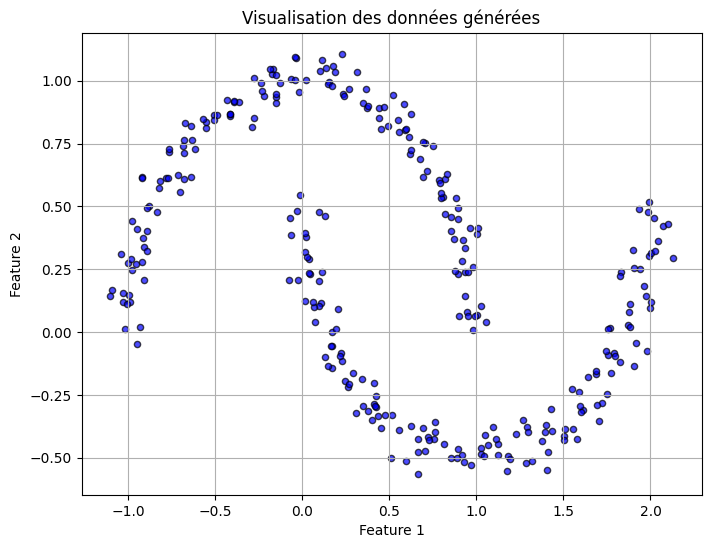

In [10]:
# Génération des données
X = generate_data()

# Affichage du dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=20, c='blue', alpha=0.7, edgecolor='k')
plt.title("Visualisation des données générées")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

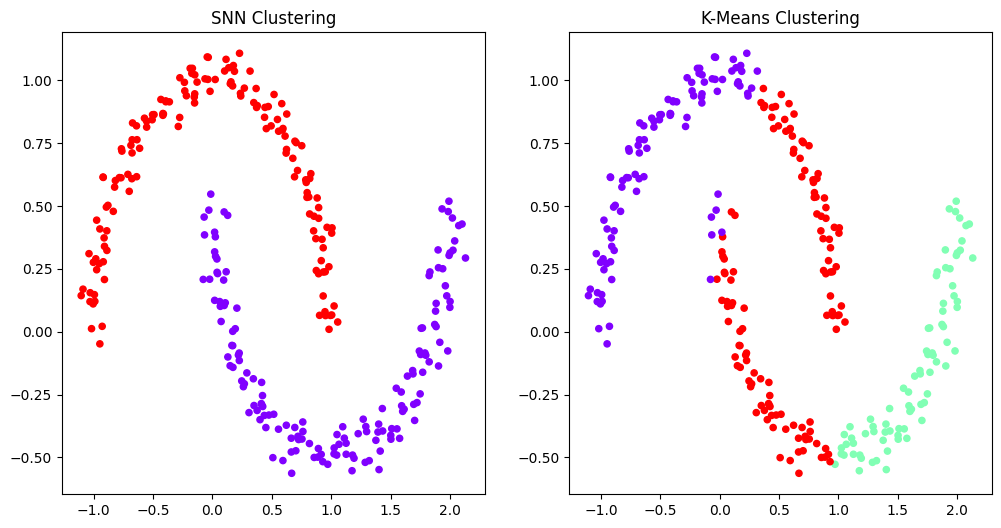

In [13]:


# Appliquer SNN et K-means
snn_labels = snn_clustering(X, k=10, min_shared_neighbors=2)
kmeans_labels = kmeans_clustering(X, n_clusters=3)

# Résultats visuels
plot_results(X, snn_labels, kmeans_labels)


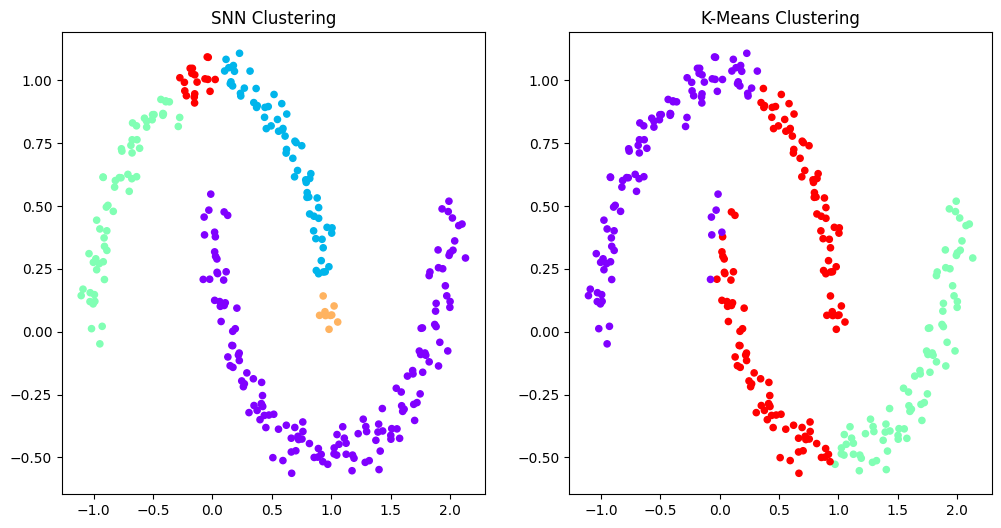

In [15]:


# Appliquer SNN et K-means
snn_labels = snn_clustering(X, k=10, min_shared_neighbors=6)
kmeans_labels = kmeans_clustering(X, n_clusters=3)

# Résultats visuels
plot_results(X, snn_labels, kmeans_labels)
